In [399]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # математические функции и матрицы
import matplotlib.pyplot as plt # графики
import statsmodels.stats.api as sms
import statsmodels.api as sm # стандартные регрессионные модели
import statsmodels.formula.api as smf # аналогичные модели с синтаксисом в стиле R
import statsmodels.graphics.gofplots as gf # визуализация моделей
import statsmodels.discrete.discrete_model # дискретные модели
from statsmodels.stats.outliers_influence import summary_table # работа с выбросами
from scipy.stats import shapiro # тест Шапиро – Уилка
import math
from scipy.stats import skew, kurtosis
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy import stats
from scipy.stats import f
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_goldfeldquandt


In [309]:
style = {
    # Цвета
    'axes.facecolor': '#FFFFFF',  # Белый фон осей
    'figure.facecolor': '#FFFFFF',  # Белый фон всей фигуры
    'axes.edgecolor': '#222222',  # Темно-серые оси
    'axes.labelcolor': '#222222',  # Темно-серые подписи осей
    'xtick.color': '#444444',  # Более светло-серые метки на оси X
    'ytick.color': '#444444',  # Более светло-серые метки на оси Y
    'text.color': '#222222',  # Тёмный текст
    'grid.color': '#DDDDDD',  # Светло-серая сетка

    # Линии и точки
    'lines.linewidth': 1.5,  
    'lines.color': '#0077B6',  # Яркий синий цвет линий
    'patch.edgecolor': '#0077B6',  # Синий цвет границ патчей
    'scatter.edgecolors': '#FB5607',  # Ярко-оранжевый цвет краёв точек

    # Boxplot стили
    'boxplot.boxprops.color': '#0077B6',  # Синий цвет рамки boxplot
    'boxplot.whiskerprops.color': '#00B4D8',  # Голубые усы
    'boxplot.capprops.color': '#0077B6',  # Синие крышки
    'boxplot.medianprops.color': '#FB5607',  # Оранжевая медиана
}


plt.style.use(style)


In [310]:
df = pd.read_csv('cars_clean')
df

,Unnamed: 0,brand,color,color_group,gearbox,drive,fuel_type,city,city_group,base_model,...,age,generation,is_new,is_restyling,is_pro,is_max,is_premium,price,power_density,mileage_age_interaction
0,0,Haval,серый,Нейтральные,робот,полный,Бензин,Москва,Москва,H3,...,1.0,1.0,False,0,0,0,0,2320000.0,118.000000,12000.0
1,1,Chery,серый,Нейтральные,механика,передний,Бензин,Москва,Москва,Tiggo,...,1.0,1.0,False,0,1,0,0,1490000.0,75.333333,52460.0
2,2,Haval,чёрный,Нейтральные,робот,полный,Бензин,Москва,Москва,H3,...,1.0,1.0,False,0,0,0,0,2650000.0,118.000000,6308.0
3,3,Geely,синий,Холодные,робот,передний,Бензин,Балашиха,Московская область,Okavango,...,2.0,1.0,False,1,0,0,0,2980000.0,100.000000,34338.0
4,4,Chery,серый,Нейтральные,робот,передний,Бензин,Москва,Москва,Tiggo,...,3.0,1.0,False,1,0,0,0,1500000.0,98.000000,66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1310,Geely,серебристый,Нейтральные,автомат,полный,Бензин,Москва,Москва,Monjaro,...,0.0,1.0,False,1,0,0,1,3830000.0,119.000000,0.0
1311,1311,Geely,голубой,Холодные,робот,передний,Бензин,Москва,Москва,Icon,...,1.0,1.0,False,0,0,0,0,2699999.0,120.666667,1.0
1312,1312,Geely,серый,Нейтральные,робот,передний,Бензин,Москва,Москва,Icon,...,1.0,1.0,False,0,0,0,0,2699999.0,120.666667,10.0
1313,1313,Geely,синий,Холодные,робот,полный,Бензин,Одинцово,Московская область,Atlas,...,3.0,1.0,False,0,1,0,0,2100000.0,118.000000,174000.0


In [393]:
target = 'price'
numeric_feats = ['mileage', 'power_1', 'power_2', 'model_popularity', 'age', 'generation', 'power_density', 'mileage_age_interaction']
cat_feats = ['brand', 'color', 'color_group', 'gearbox', 'drive', 'fuel_type', 'city', 'city_group', 'base_model', 'car_class']
dummies = ['is_new', 'is_restyling', 'is_pro', 'is_max', 'is_premium']

### Построим линейную модель

In [357]:
target = 'price'
numeric_feats = ['mileage', 'power_2', 'model_popularity', 'age', 'generation', 'power_density', 'mileage_age_interaction']
cat_feats = ['brand', 'color', 'gearbox', 'drive', 'fuel_type', 'city_group']
dummies = ['is_new', 'is_restyling', 'is_pro', 'is_max', 'is_premium']

In [394]:
# Возьмем все признаки, категориальные превратим в дамми
X_cat = pd.get_dummies(df[cat_feats], drop_first=True)

# Признаки
X = pd.concat([df[numeric_feats], X_cat, df[dummies]], axis=1)
X = sm.add_constant(X)

# Целевая переменная
Y = pd.to_numeric(df[target], errors='coerce')

In [395]:
# преоразуем були в бинарные переменные
for col in X.columns:
    if X[col].dtype == 'bool':
        X[col] = X[col].astype(int)

Скорректируем признаки: районы Москвы являются Москвой

In [314]:
msk_columns = [col for col in X.columns 
              if col.startswith('city_') and 
              col != 'city_Москва' and  # исключаем основной признак
              ('Москва' in col or 
               'административный округ' in col or
               'Тёплый Стан' in col or
               'Братеево' in col or
               'Раздоры' in col or
               'Ржавки' in col or
               'Сухарево' in col)]

# 2. Обновляем признак city_Москва: 1 если есть любой московский район
if msk_columns:  # если такие столбцы существуют
    X['city_Москва'] = X[msk_columns + ['city_Москва']].any(axis=1).astype(int)
    X = X.drop(columns=msk_columns)
else:
    # если столбцов с районами нет, оставляем как есть
    pass

Проверим, нет ли одинаковых столбцов в датафрейме

In [360]:
duplicate_columns = []
for i, col1 in enumerate(X.columns):
    for j, col2 in enumerate(X.columns[i+1:]):
        if X[col1].equals(X[col2]):
            duplicate_columns.append((col1, col2))

print("Дубликаты столбцов:")
for pair in duplicate_columns:
    print(f"{pair[0]} == {pair[1]}")

Дубликаты столбцов:


In [398]:
corr_matrix = X.corr()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs != 1]
print(corr_pairs.head(20))

is_premium                base_model_Monjaro          0.995878
base_model_Monjaro        is_premium                  0.995878
city_group_Москва         city_Москва                 0.988525
city_Москва               city_group_Москва           0.988525
color_жёлтый              color_group_Тёплые          0.932955
color_group_Тёплые        color_жёлтый                0.932955
car_class_SUV             base_model_Atlas            0.903926
base_model_Atlas          car_class_SUV               0.903926
mileage_age_interaction   age                         0.900740
age                       mileage_age_interaction     0.900740
car_class_Luxury SUV      base_model_F7               0.879870
base_model_F7             car_class_Luxury SUV        0.879870
color_group_Экзотические  color_фиолетовый            0.848328
                          city_Московский             0.848328
city_Московский           color_group_Экзотические    0.848328
color_фиолетовый          color_group_Экзотические    0

In [363]:
X = X.loc[:, ~X.columns.str.startswith('city_group')]
X = X.loc[:, ~X.columns.str.startswith('color_group')]
X = X.loc[:, ~X.columns.str.startswith('base_model')]
X = X.loc[:, ~X.columns.str.startswith('color_фиолетовый')]

Проверим ранги матриц

In [385]:
print(np.linalg.matrix_rank(X))
print(X.shape[1])

29
29


Вновь проверим на мультиколлинеарность

In [389]:
X = X.loc[:, ~X.columns.str.startswith('const')]

In [390]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

high_vif_features = vif_data[vif_data["VIF"] > 10]
print("\nОтсортировано по VIF (по убыванию):\n", high_vif_features.sort_values("VIF", ascending=False))


Отсортировано по VIF (по убыванию):
              feature         VIF
3      power_density  117.458822
5        brand_Geely   26.314500
2         generation   25.351583
1   model_popularity   19.612875
20     gearbox_робот   12.272112


In [391]:
model = sm.OLS(Y, X).fit()


In [392]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2939.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):                        0.00
Time:                        15:10:27   Log-Likelihood:                         -18517.
No. Observations:                1315   AIC:                                  3.709e+04
Df Residuals:                    1287   BIC:                                  3.723e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### График Остатки-прогнозы

/var/folders/2l/n72xwmrs7sv8qw6zsw6flx4w0000gn/T/ipykernel_84182/699730349.py:7: RuntimeWarning: invalid value encountered in sqrt
  studentized_residuals = residuals / (np.sqrt(model.mse_resid * (1 - h_ii)))


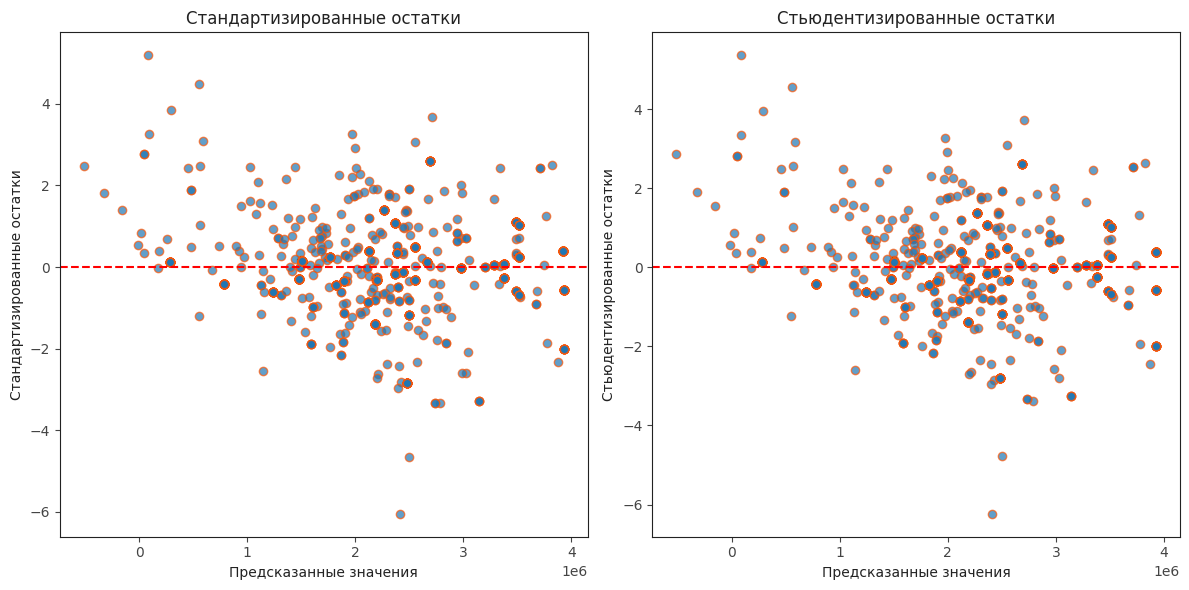

In [386]:
fitted_values = model.fittedvalues
residuals = model.resid

standardized_residuals = residuals / np.std(residuals)

h_ii = model.get_influence().hat_matrix_diag
studentized_residuals = residuals / (np.sqrt(model.mse_resid * (1 - h_ii)))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(fitted_values, standardized_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Стандартизированные остатки')
plt.xlabel('Предсказанные значения')
plt.ylabel('Стандартизированные остатки')

plt.subplot(1, 2, 2)
plt.scatter(fitted_values, studentized_residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Стьюдентизированные остатки')
plt.xlabel('Предсказанные значения')
plt.ylabel('Стьюдентизированные остатки')

plt.tight_layout()
plt.show()


### Тест бройша пагана

In [387]:
bp_test = sms.het_breuschpagan(model.resid, model.model.exog)

print('Breusch-Pagan Test:')
print(f'LM Statistic: {bp_test[0]:.4f}')
print(f'LM p-value: {bp_test[1]:.4f}')
print(f'F-Statistic: {bp_test[2]:.4f}')
print(f'F p-value: {bp_test[3]:.4f}')


Breusch-Pagan Test:
LM Statistic: 147.2996
LM p-value: 0.0000
F-Statistic: 5.7937
F p-value: 0.0000


### Тест Уайта

In [388]:
white_test = het_white(model.resid, model.model.exog)

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, white_test))

print('White Test Results:')
for key, value in results.items():
    print(f"{key}: {value:.4f}")


AssertionError: 

### Проверка VIF

In [298]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             feature         VIF
0              const    0.000000
1            mileage   11.098846
2            power_1  153.043987
3            power_2  458.679634
4   model_popularity   33.453090
..               ...         ...
76            is_new         inf
77      is_restyling    3.310856
78            is_pro   11.781023
79            is_max   10.071598
80        is_premium   44.518966

[81 rows x 2 columns]


### Тест Голдфельда-Квандта

In [400]:
result = het_goldfeldquandt(model.resid, model.model.exog)
print(f"F-статистика = {result[0]:.3f}")
print(f"p-value = {result[1]:.3f}")

if result[1] < 0.05:
    print("Есть гетероскедастичность!")
else:
    print("Гомоскедастичность не отвергается.")

F-статистика = 0.611
p-value = 1.000
Гомоскедастичность не отвергается.


### Проверка полноранговости матрицы 

In [401]:
rank = np.linalg.matrix_rank(X)
print(f"Ранг матрицы: {rank}")

if rank == min(X.shape):
    print("Матрица полноранговая")
else:
    print("Матрица не является полноранговой")

Ранг матрицы: 112
Матрица не является полноранговой


### T-тест: нулевые мат ожидания ошибок

Если 
p
-значение выше 0.05 → нет оснований отвергать 
H
0
, математическое ожидание ошибок действительно ≈ 0.

In [402]:
t_stat, p_value = stats.ttest_1samp(model.resid, popmean=0)
print(f't-статистика: {t_stat}, p-значение: {p_value}')

t-статистика: 0.30623526185235894, p-значение: 0.7594740395266137
